In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv"
data = pd.read_csv(url)

In [15]:
data = data.replace({"-": 0})         ##Reemplazamos los valores -  con un 0
data = data.replace(np.nan, 0)        ##Reemplazamos los valores no existentes con un 0

In [16]:
for col in data.columns:              ## Cambiamos el tipo de data
    if col != "Region" and col != "Poblacion":
        data[col] = data[col].astype(int)

## Mostramos la Información entregada por el ministerios de Ciencia
* Los valores que están en 0 fueron transformados desde valores no entregados como "-" o NaN. Para un mejor trabajo de los datos. EN NINGUN CASO SIGNIFICA QUE EN ESOS DIAS SE HICIERON 0 TEST POR REGIÓN.

In [17]:
data

,Region,Codigo region,Poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
0,Arica y Parinacota,15,252110,70,0,0,103,0,93,24,...,0,169,85,90,73,146,80,61,84,124
1,Tarapacá,1,382773,0,0,0,0,0,0,0,...,59,30,203,118,58,58,57,111,124,8
2,Antofagasta,2,691854,182,128,107,175,103,95,117,...,152,146,166,217,214,180,181,198,259,164
3,Atacama,3,314709,57,52,60,25,20,22,25,...,47,57,77,46,54,56,73,112,107,114
4,Coquimbo,4,836096,0,0,0,0,0,0,0,...,29,22,44,42,72,0,148,74,78,166
5,Valparaíso,5,1960170,301,249,248,273,223,92,385,...,384,90,293,262,201,167,184,169,278,450
6,Metropolitana,13,8125072,5383,3158,2105,3861,1850,1656,2694,...,3917,3712,4376,4218,4313,3289,2975,4349,5282,6144
7,O’Higgins,6,991063,68,0,74,0,74,30,30,...,0,86,72,0,195,30,95,105,111,94
8,Maule,7,1131939,397,219,0,341,113,160,0,...,724,663,606,254,349,535,255,58,249,187
9,Ñuble,16,511551,364,0,259,189,65,0,0,...,221,189,0,371,91,90,59,104,120,129


## Cantidad de tests totales realizados a lo largo del tiempo en el pais

In [18]:
fechas = data.columns[(data.columns != 'Region') & (data.columns != 'Poblacion') & (data.columns != "Codigo region")]

In [19]:
X = []
Y = []
for fecha in fechas:
    total = data[fecha].sum()
    Y.append(total)
    X.append(fecha)

In [20]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 1),
            textcoords="offset points",
            ha ='center', va='bottom')

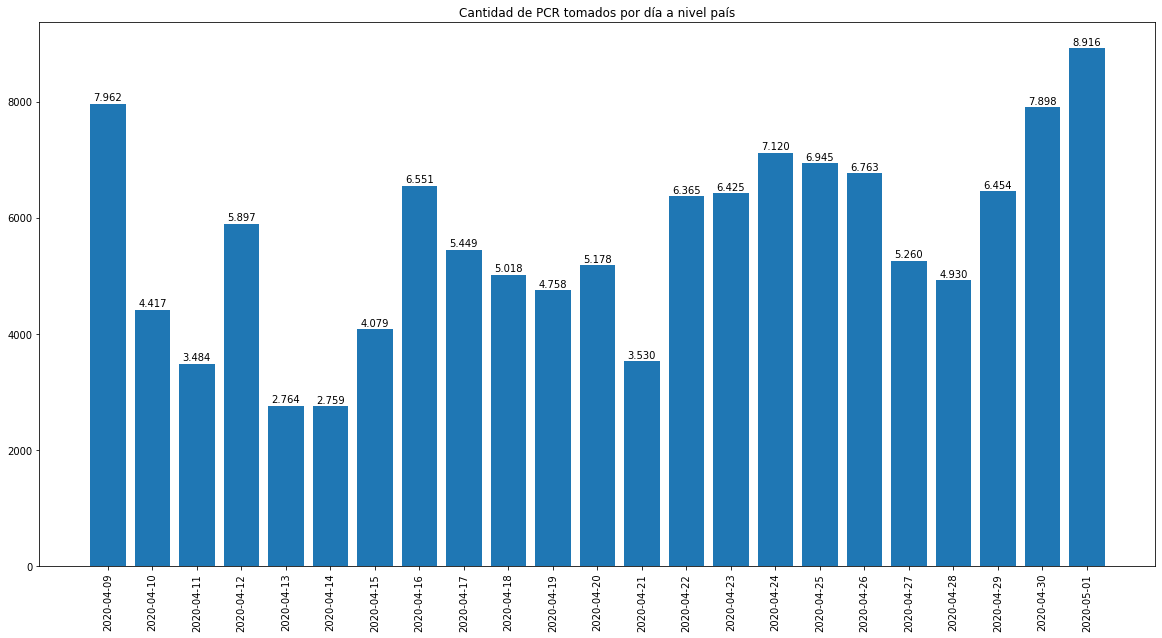

In [21]:
plt.figure(figsize=(20,10))
plt.bar(X,Y)
plt.xticks(X, rotation='vertical')
plt.title("Cantidad de PCR tomados por día a nivel país")
labelonbars(X, Y)
plt.show()

## Cantidad total de test por región

In [22]:
total_por_region =  data[fechas].sum(axis=1).to_list()
Y                =  total_por_region
X                =  data["Region"].to_list()

In [23]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(Y[i], X[i]),
            xytext =(20, -5),
            textcoords="offset points",
            ha ='center', va='bottom')

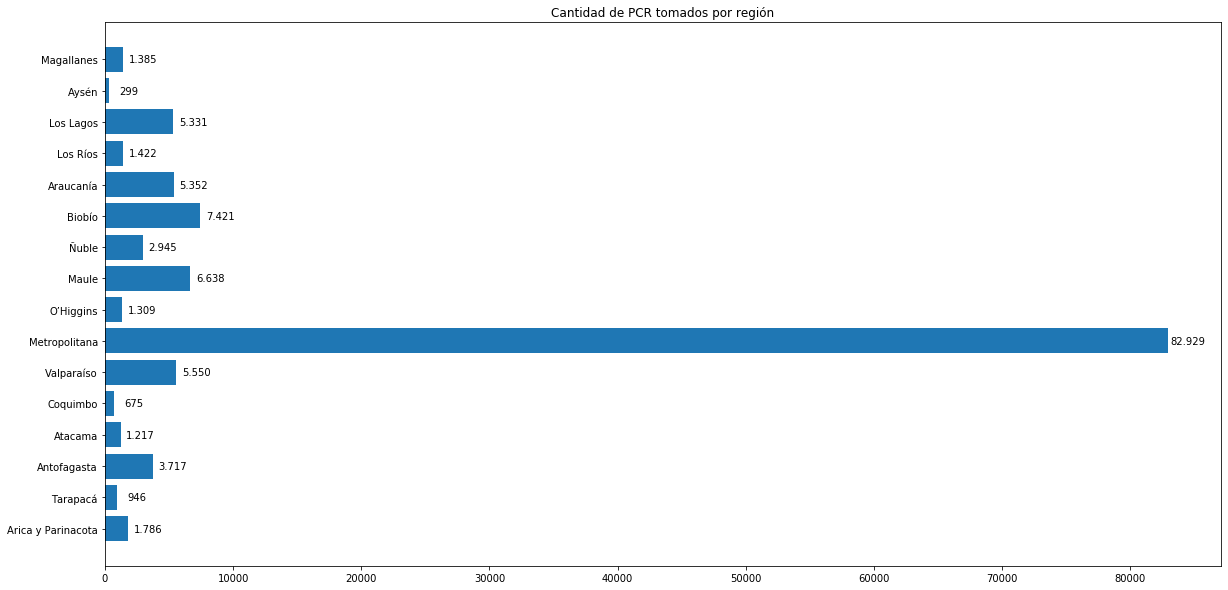

In [24]:
plt.figure(figsize=(20,10))
plt.barh(X,Y)
plt.title("Cantidad de PCR tomados por región")
labelonbars(X, Y)
plt.show()

## Porcentaje de test positivos por día

### Creamos el dataframe de |fecha | PCRS|

In [33]:
pcr_totales = data[fechas].sum().values.tolist()

In [40]:
df_pcr_totales = pd.DataFrame({
                                'Fecha': fechas,
                                'PCRS': pcr_totales
                                })

In [66]:
df_pcr_totales.tail(5)

,Fecha,PCRS
18,2020-04-27,5260
19,2020-04-28,4930
20,2020-04-29,6454
21,2020-04-30,7898
22,2020-05-01,8916


### Creamos el dataframe |Fecha|Cantidad de positivos|

In [46]:
url        = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data_total = pd.read_csv(url)
positivos  = data_total[data_total["Fecha"] == "Casos nuevos totales"]

In [50]:
fecha_positivos = positivos.columns[1:]

In [62]:
test_positivos  = positivos.values.tolist()[0][1:]

In [63]:
df_positivos    = pd.DataFrame({
                                'Fecha': fecha_positivos,
                                'Positivos': test_positivos
                                })

In [65]:
df_positivos.tail(5)

,Fecha,Positivos
55,2020-04-27,482.0
56,2020-04-28,552.0
57,2020-04-29,770.0
58,2020-04-30,888.0
59,2020-05-01,985.0


### Unimos los dataframe

In [78]:
df = pd.merge(df_pcr_totales, df_positivos, on='Fecha')

In [80]:
df["Porcentaje de positivos"] = df["PCRS"] / df["Positivos"]

In [82]:
df.tail(5)

,Fecha,PCRS,Positivos,Porcentaje de positivos
18,2020-04-27,5260,482.0,10.912863
19,2020-04-28,4930,552.0,8.931159
20,2020-04-29,6454,770.0,8.381818
21,2020-04-30,7898,888.0,8.894144
22,2020-05-01,8916,985.0,9.051777


## Porcentaje de test positivos a lo largo del tiempo

In [84]:
X = df["Fecha"].values.tolist()
Y = df["Porcentaje de positivos"].values.tolist()

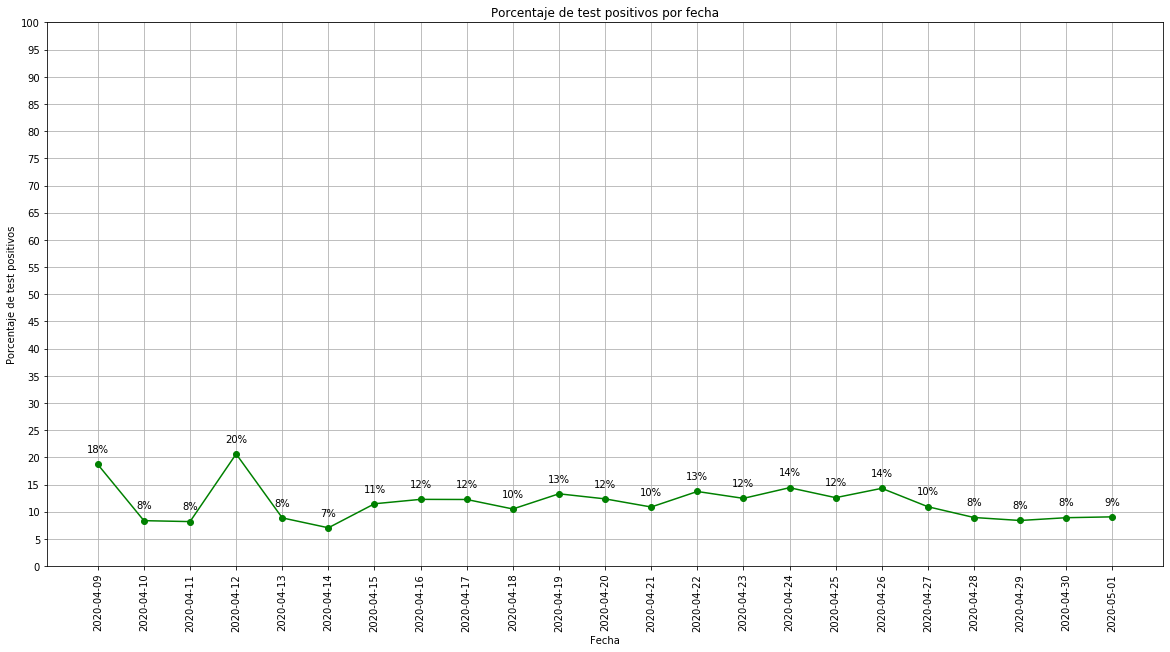

In [99]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        number = str(number) + "%"
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom')
        
plt.figure(figsize=(20,10))
plt.plot(X, Y, 'go-')
labelonbars(X, Y)
plt.xlabel('Fecha')
plt.ylabel("Porcentaje de test positivos")
plt.title("Porcentaje de test positivos por fecha")
plt.grid()
plt.xticks(X, rotation='vertical')
plt.yticks(np.arange(0, 105, 5))
plt.show()